In [ ]:
# 1️⃣ Imports
import sys
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


# Add project root to sys.path
root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))  # ".." goes one level up from notebooks
sys.path.append(root_path)

# Import your modules
from modules.stock.data_loader import load_stock
from modules.stock.eda import basic_info, plot_time_series
from modules.stock.indicators import add_sma, add_ema, add_rsi, add_macd, add_bollinger_bands
from modules.stock.plotting import plot_price_with_ma, plot_rsi, plot_macd, plot_bollinger_bands
from modules.stock.utils import get_price_column, list_stock_files

# Set folder path relative to notebook
DATA_PATH = os.path.abspath('../data/stock_data')
print("DATA_PATH:", DATA_PATH)

# List available stocks
symbols = list_stock_files(DATA_PATH)
print("Available stocks:", symbols)

# Load a stock as a test
df_aapl = load_stock("AAPL")
print(df_aapl.head())


DATA_PATH: c:\Users\derej\Desktop\Kifya\sentiment\data\stock_data
Available stocks: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
               Close      High       Low      Open      Volume     Price
Date                                                                    
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200  2.721686
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400  2.836553
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400  2.789767
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800  2.729484
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800  2.780169


2️⃣ List all stock symbols

In [10]:
symbols = list_stock_files(DATA_PATH)
print("Available stocks:", symbols)
# Example output: ['AAPL','AMZN','GOOG','META','MSFT','NVDA']


Available stocks: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


3️⃣ Load stock data

In [11]:
# Load all stocks into a dictionary
df_dict = {symbol: load_stock(symbol) for symbol in symbols}

# Check a sample
df_dict['AAPL'].head()


,Close,High,Low,Open,Volume,Price
Date,,,,,,
2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,2.721686
2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,2.836553
2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,2.789767
2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,2.729484
2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,2.780169


4️⃣ Run EDA


===== BASIC INFO (AAPL) =====
Shape: (3774, 15)

Data types:
Close          float64
High           float64
Low            float64
Open           float64
Volume           int64
Price          float64
SMA_20         float64
EMA_20         float64
RSI_14         float64
MACD           float64
MACD_signal    float64
MACD_hist      float64
BB_Upper       float64
BB_Middle      float64
BB_Lower       float64
dtype: object

DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        3774 non-null   float64
 1   High         3774 non-null   float64
 2   Low          3774 non-null   float64
 3   Open         3774 non-null   float64
 4   Volume       3774 non-null   int64  
 5   Price        3774 non-null   float64
 6   SMA_20       3755 non-null   float64
 7   EMA_20       3755 non-null   float64
 8   RSI_14    

,Close,High,Low,Open,Volume,Price,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,
2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,2.721686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,2.836553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,2.789767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,2.729484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,2.780169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Last 5 rows:


,Close,High,Low,Open,Volume,Price,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,191.788757,191.856618,191.510231,54.672784,2.633141,3.235256,-0.602115,197.478146,191.856618,186.235090
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,191.243912,192.018094,191.484867,53.090049,2.304751,3.049155,-0.744404,197.367843,192.018094,186.668345
2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,191.342972,192.154308,191.471353,53.354446,2.029104,2.845145,-0.816041,197.285152,192.154308,187.023465
2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900,191.768951,192.362839,191.499696,54.540999,1.823998,2.640915,-0.816918,197.056446,192.362839,187.669231
2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100,190.728775,192.490633,191.426275,51.121347,1.559539,2.424640,-0.865101,196.848102,192.490633,188.133164


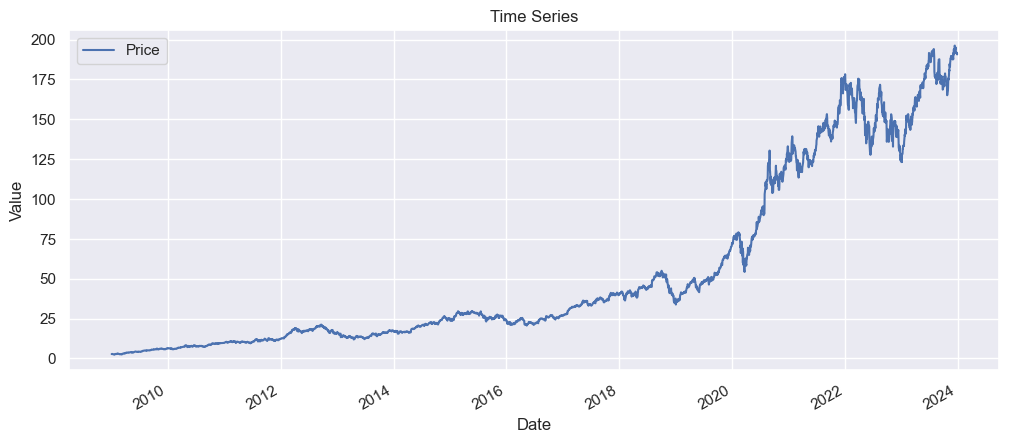

In [24]:
# Example: basic info and time series plot for AAPL
df_aapl = df_dict['AAPL']
basic_info(df_aapl, symbol='AAPL')
plot_time_series(df_aapl, columns=get_price_column(df_aapl))

5️⃣ Add TA-Lib indicators

In [26]:
# Add indicators for AAPL
price_col = get_price_column(df_aapl)

df_aapl = add_sma(df_aapl, window=20, column=price_col)
df_aapl = add_ema(df_aapl, window=20, column=price_col)
df_aapl = add_rsi(df_aapl, column=price_col)
df_aapl = add_macd(df_aapl, column=price_col)
df_aapl = add_bollinger_bands(df_aapl, column=price_col)

df_aapl.head()

,Close,High,Low,Open,Volume,Price,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,
2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,2.721686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,2.836553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,2.789767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,2.729484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,2.780169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6️⃣ Plot indicators

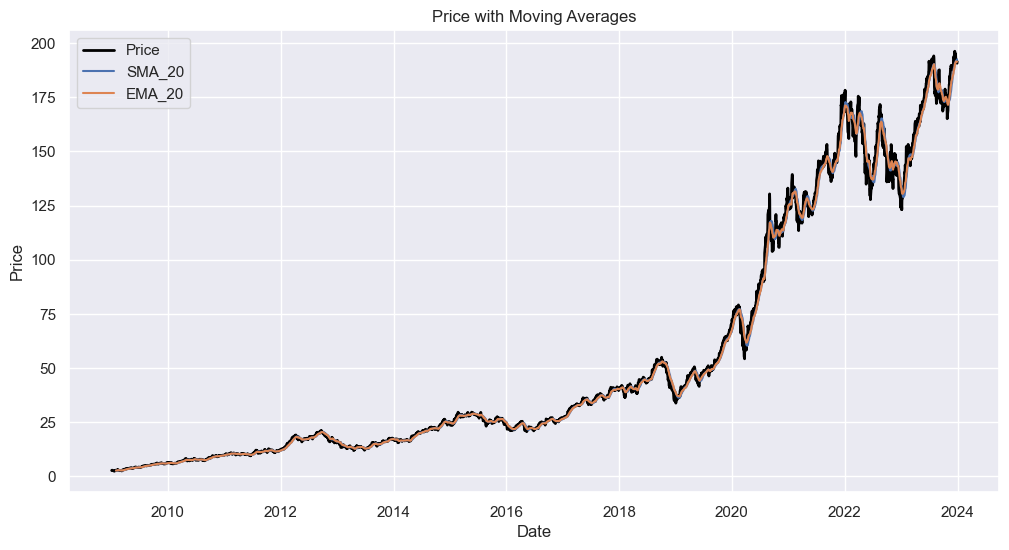

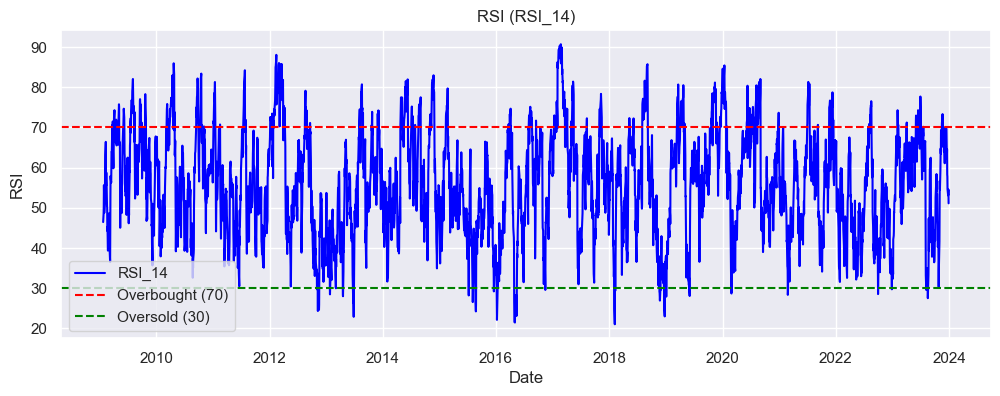

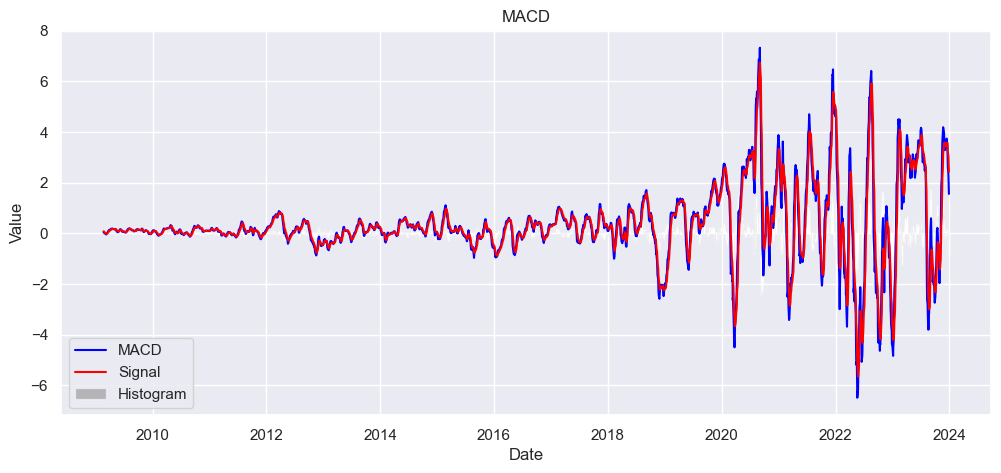

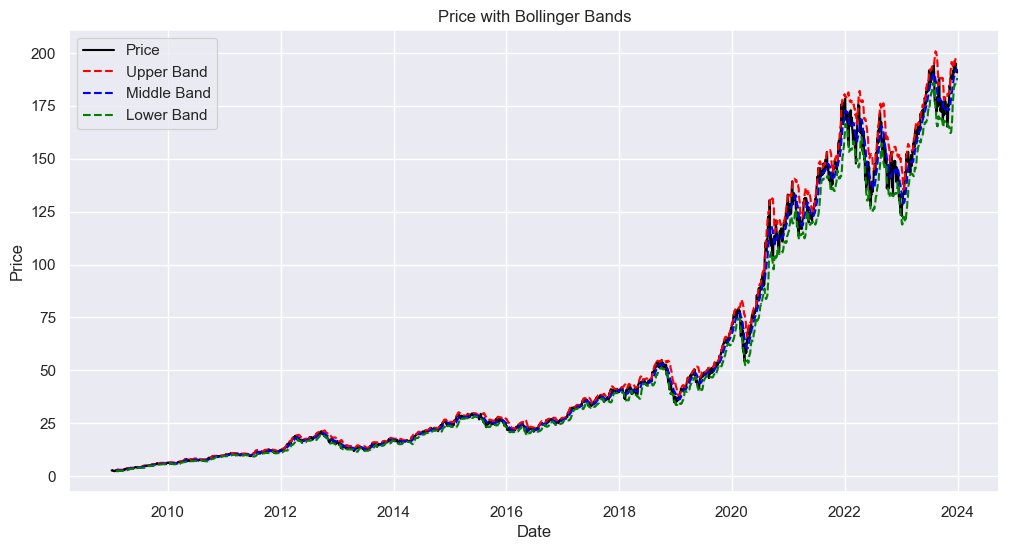

In [14]:
# Price with SMA and EMA
plot_price_with_ma(df_aapl, ma_cols=['SMA_20','EMA_20'], price_col=price_col)

# RSI
plot_rsi(df_aapl, rsi_col='RSI_14')

# MACD
plot_macd(df_aapl)

# Bollinger Bands
plot_bollinger_bands(df_aapl, price_col=price_col)


7️⃣ Prepare portfolio data

In [15]:
# Combine all stocks into returns DataFrame
returns_df = prepare_portfolio_data(df_dict, price_col='Price')  # utils.get_price_column already handles adj close

# Check returns
returns_df.head()


NameError: name 'prepare_portfolio_data' is not defined

8️⃣ Optimize portfolio

In [ ]:
# Optimize portfolio using Pynance
portfolio = optimize_portfolio(returns_df, risk_free_rate=0.01)

# View optimized weights
print("Optimized portfolio weights:")
print(portfolio.weights)

# Portfolio performance
print("\nPortfolio performance:")
print(portfolio.performance)
